In this notebook, we analyze the influence approximation of fractal pore space has on various corrosion-driven mechanisms  

#### Affiliations & E-mails
- Mohit Pundir: mpundir@ethz.ch

¹: Computational Mechanics of Building Materials, ETH Zurich, Switzerland.


## Environment setup
We start by setting up the data and python packages we need. To read the data, we use a database-manager python module which can be downloaded from `https://gitlab.com/mohitpundir/database-manager`. Please git clone the repository and append the system path to find the python package 

In [1]:
from plot_helper_for_paper import *
import manager as dm

> Please specify the path to the dataset collection.

In [52]:
path = './'

## Evolution of damages, stress and porosity in Fractal pore space

Reading the data for fractal space with a porosity of 0.36. The corresponding dataset is `multiscale-higher-network-same`.

In [2]:
schema = dm.Digger(path, 'multiscale-higher-network-same')
df = schema.showParametericSpace(shell_display=False)
df.loc[:, ~df.columns.isin(['path', 'schema'])]

flux                               idx  nb_steps  rve  time  \
0  1.000000e-08  7b8c97643988488d96a5b30aa5d573c7      2500    2  5000   
1  1.000000e-08  7907f896c162417c821f2db207f33f6c      2500    1  5000   
2  1.000000e-08  6f34093c0c1646c99e266a25e49d4706      2500    2  5000   
3  1.000000e-08  d13eedb42161447b95227ff86d4db520      2500    1  5000   

        type  
0    fractal  
1    fractal  
2  euclidean  
3  euclidean

In [3]:
job_id = schema.job.digID({'type' : 'fractal', 'rve' : 1})
schema.job.showDatabaseSpace(job_id, shell_display=False).T

Data Quantities in for Job | 7907f896c162417c821f2db207f33f6c 


0              1
concentration.macro      float64    (2250, 101)
damage.macro             float64        (2250,)
damage.micro             float64  (2250, 39601)
diff_coefficient.macro   float64        (2250,)
gradient.macro           float64        (2250,)
porosity_decrease.macro  float64        (2250,)
porosity_increase.macro  float64        (2250,)
precipitate.macro        float64        (2250,)
sigma_x.macro            float64        (2250,)
sigma_y.macro            float64        (2250,)
structure                float64  (2250, 39601)
timings                  float64        (2250,)

In [4]:
output_fields = ['damage.macro', 'damage.micro', 'precipitate.macro', 'sigma_x.macro', 
                 'sigma_y.macro', 'structure', 'concentration.macro', 'timings', 'porosity_increase.macro']
results = schema.job.digQuantities(output_fields, job_id)

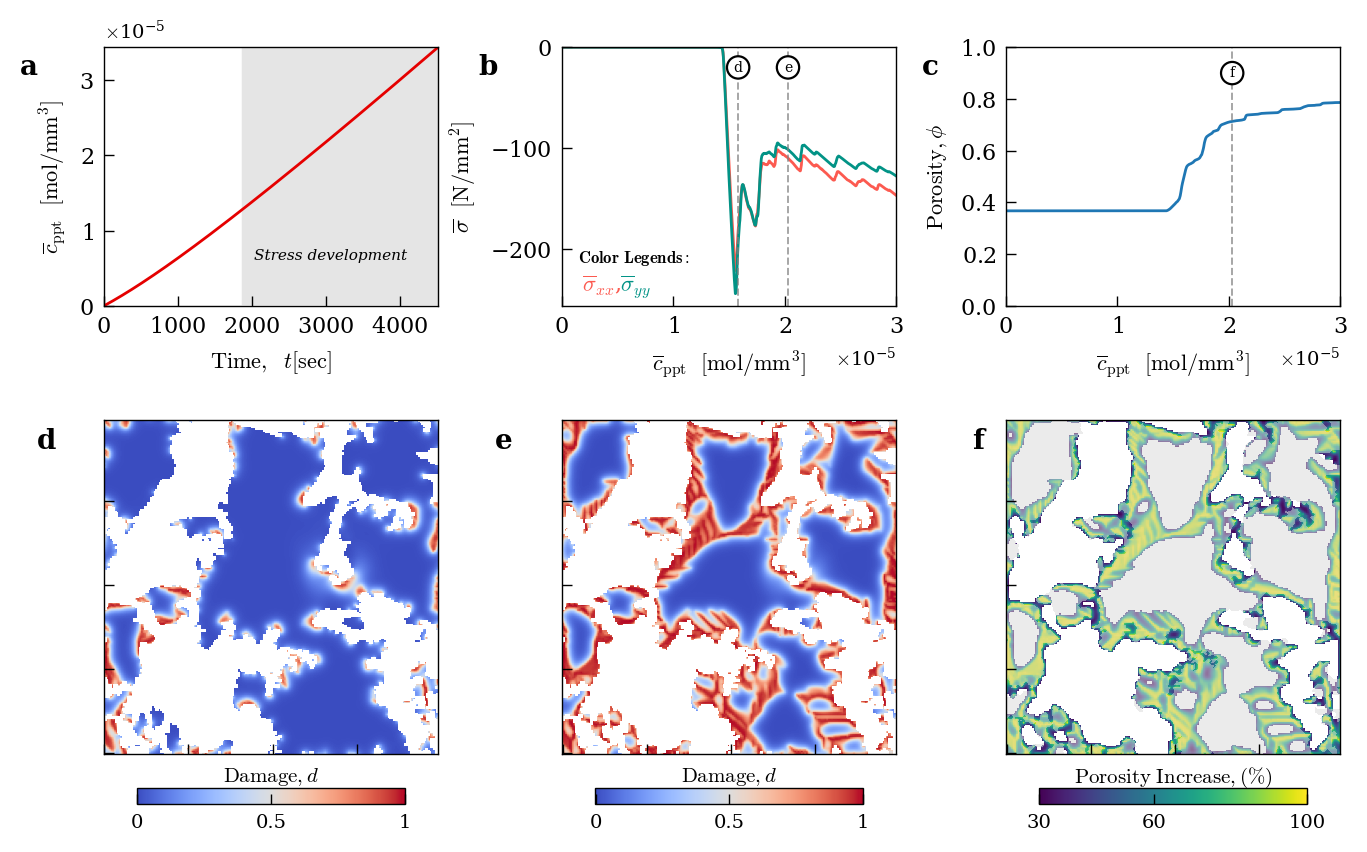

In [51]:
size = int(np.sqrt(len(results['structure'][0])))

fig= plt.figure(figsize=set_size(fraction=0.95), constrained_layout=True, dpi=200)

gs1 = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1.5])

ax = fig.add_subplot(gs1[0, 0])
ax.plot(results['timings'], results['precipitate.macro'], lw=1, color='xkcd:red')

ax.axvline(results['precipitate.macro'][1400], lw=0.7, color='grey', ls='--', alpha=0.7)
index = np.argwhere(results['sigma_x.macro'] < 0)[0][0]

ax.fill_betweenx(results['precipitate.macro'], results['timings'][index], results['timings'][-1], facecolor='grey', alpha=0.2)
ax.text(0.45, 0.22, r'Stress development', style='italic', color='k', transform=ax.transAxes, fontsize=5.5, va='top')

ax.set_xlim(0, results['timings'][-1])
ax.set_ylim(0, results['precipitate.macro'][-1])
ax.set_ylabel(r'$\overline{ c}_\mathrm{ppt}~~[\mathrm{mol/mm}^{3}]$', fontsize=8)
ax.set_xlabel(r'$\mathrm{Time,}~~t[\mathrm{sec}]$', fontsize=8)

ax.text(-0.25, 0.975, 'a', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')

ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)


# stress
ax = fig.add_subplot(gs1[0, 1])
ax.plot(results['precipitate.macro'], results['sigma_x.macro'], lw=1, color='xkcd:coral')
ax.plot(results['precipitate.macro'], results['sigma_y.macro'], lw=1, color='xkcd:teal')

ax.axvline(results['precipitate.macro'][1120], lw=0.7, color='grey', ls='--', alpha=0.7)
ax.axvline(results['precipitate.macro'][1400], lw=0.7, color='grey', ls='--', alpha=0.7)

ax.text(
    results['precipitate.macro'][1120], -20, "d", ha="center", va="center", size=5,
    bbox=dict(boxstyle="circle", fc="white", ec="k", lw=0.8))
ax.text(
    results['precipitate.macro'][1400], -20, "e", ha="center", va="center", size=5,
    bbox=dict(boxstyle="circle", fc="white", ec="k", lw=0.8))



ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)


ax.set_xlim(0, 3e-5)
ax.set_ylim(top=0)
ax.set_xlabel(r'$\overline{ c}_\mathrm{ppt}~~[\mathrm{mol/mm}^{3}]$', fontsize=8)
ax.set_ylabel(r'$\overline{\sigma}~~[\mathrm{N/mm}^{2}]$', fontsize=8)

ax.text(0.05, 0.22, r'$\mathbf{Color~Legends:}$', color='k', transform=ax.transAxes, fontsize=6, va='top')
ax.text(0.06, 0.125, r'$\overline{\sigma}_{xx}$,', color='xkcd:coral', transform=ax.transAxes, fontsize=8, va='top')
ax.text(0.175, 0.125, r'$\overline{\sigma}_{yy}$', color='xkcd:teal', transform=ax.transAxes, fontsize=8, va='top')

ax.text(-0.25, 0.975, 'b', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')

# porosity
ax = fig.add_subplot(gs1[0, 2])

ax.plot(results['precipitate.macro'], results['porosity_increase.macro'], lw=1, color='tab:blue')

ax.axvline(results['precipitate.macro'][1400], lw=0.7, color='grey', ls='--', alpha=0.7)
ax.text(
    results['precipitate.macro'][1400], 0.9, "f", ha="center", va="center", size=5,
    bbox=dict(boxstyle="circle", fc="white", ec="k", lw=0.8))

ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)


ax.set_xlim(0)
ax.set_ylim(0, 1)
ax.set_xlabel(r'$\overline{ c}_\mathrm{ppt}~~[\mathrm{mol/mm}^{3}]$', fontsize=8)
ax.set_ylabel(r'$\mathrm{Porosity},\phi$', fontsize=8)


ax.text(-0.25, 0.975, 'c', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')
ax.set_xlim(0, 3e-5)

# damage map
ax = fig.add_subplot(gs1[1, 0])

cs = ax.imshow(np.ma.array(results['damage.micro'][1120].reshape(size, size), 
                              mask=results['structure'][320].reshape(size, size)), vmax=1, cmap='coolwarm', origin="lower")
ax.set_xticklabels([])
ax.set_yticklabels([])

axins1 = ax.inset_axes([0.1, -0.15, 0.8, 0.05])

cbar = fig.colorbar(cs, cax=axins1, pad=0.05, 
                      fraction=0.025, shrink=.5, ticks=[0, 0.5, 1], orientation="horizontal")
cbar.ax.set_xticklabels(['0', '0.5', '1'])
cbar.set_label(r'$\mathrm{Damage}, d$', fontsize=7.5, labelpad=-24, y=0.85)

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.text(-0.2, 0.975, 'd', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')

#damage map
ax = fig.add_subplot(gs1[1, 1])

cs = ax.imshow(np.ma.array(results['damage.micro'][1400].reshape(size, size), 
                              mask=results['structure'][360].reshape(size, size)), vmax=1, cmap='coolwarm', origin="lower")
ax.set_xticklabels([])
ax.set_yticklabels([])

axins1 = ax.inset_axes([0.1, -0.15, 0.8, 0.05])

cbar = fig.colorbar(cs, cax=axins1, pad=0.05, 
                      fraction=0.025, shrink=.5, ticks=[0, 0.5, 1], orientation="horizontal")

cbar.ax.set_xticklabels(['0', '0.5', '1'])
cbar.set_label(r'$\mathrm{Damage}, d$', fontsize=7.5, labelpad=-24, y=0.85)

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.text(-0.2, 0.975, 'e', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')

# damage map
ax = fig.add_subplot(gs1[1, 2])
structure = results['structure'][360].reshape(size, size)
ax.contourf(np.ma.array(1-structure[:, :], mask=structure), alpha=0.5,  cmap='Greys')
masked_crack = np.where(results['damage.micro'][1400].reshape(size, size) >= 0.3, 1, 0)
cs = ax.imshow(np.ma.array(results['damage.micro'][1400].reshape(size, size)*100,
                           mask=1-masked_crack), vmin=30, vmax=100, cmap='viridis', origin="lower")

ax.set_xticklabels([])
ax.set_yticklabels([])

axins1 = ax.inset_axes([0.1, -0.15, 0.8, 0.05])

cbar = fig.colorbar(cs, cax=axins1, pad=0.05, 
                      fraction=0.025, shrink=.5, ticks=[30, 60, 100], orientation="horizontal")
cbar.ax.set_xticklabels(['30', '60', '100'])

cbar.set_label(r'$\mathrm{Porosity~Increase}, (\%)$', fontsize=7.5, labelpad=-24, y=0.85)

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=8)

ax.text(-0.1, 0.975, 'f', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')

plt.savefig('/cluster/work/cmbm/mpundir/pore-structure-study/figures/fracture-evolution-fractal.pdf', format='pdf')

plt.show()

## Comparison with Euclidean pore space
Reading the data for Euclidean space generated with pore network algorithm . The corresponding dataset is `multiscale-higher-network-same`.

In [18]:
schema = dm.Digger(path, 'multiscale-higher-network-same')
df = schema.showParametericSpace(shell_display=False)
df.loc[:, ~df.columns.isin(['path', 'schema'])]

flux                               idx  nb_steps  rve  time  \
0  1.000000e-08  7b8c97643988488d96a5b30aa5d573c7      2500    2  5000   
1  1.000000e-08  7907f896c162417c821f2db207f33f6c      2500    1  5000   
2  1.000000e-08  6f34093c0c1646c99e266a25e49d4706      2500    2  5000   
3  1.000000e-08  d13eedb42161447b95227ff86d4db520      2500    1  5000   

        type  
0    fractal  
1    fractal  
2  euclidean  
3  euclidean

In [19]:
fixed_param = {'rve' : 1}
varying_param = 'type'
concentrations_1 = schema.digQuantity(quantity='concentration.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param) 

stresses_x_1 = schema.digQuantity(quantity='sigma_x.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param)

stresses_y_1 = schema.digQuantity(quantity='sigma_y.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)


precipitates_1 = schema.digQuantity(quantity='precipitate.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

timings_1 = schema.digQuantity(quantity='timings', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

damages_1 = schema.digQuantity(quantity='damage.micro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

rve_1  = schema.digQuantity(quantity='structure', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

damages_macro_1 = schema.digQuantity(quantity='damage.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)



fixed_param = {'rve' : 2}
varying_param = 'type'
concentrations_2 = schema.digQuantity(quantity='concentration.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param) 

stresses_x_2 = schema.digQuantity(quantity='sigma_x.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param)

stresses_y_2 = schema.digQuantity(quantity='sigma_y.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)


precipitates_2 = schema.digQuantity(quantity='precipitate.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

timings_2 = schema.digQuantity(quantity='timings', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

rve_2  = schema.digQuantity(quantity='structure', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

damages_macro_2 = schema.digQuantity(quantity='damage.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

Reading the data for Euclidean space generated with pore network algorithm and modified to preserve the porosity. The corresponding dataset is `multiscale-higher-porosity-same`.

In [20]:
schema2 = dm.Digger(path, 'multiscale-higher-porosity-same')
df = schema2.showParametericSpace(shell_display=False)
df.loc[:, ~df.columns.isin(['path', 'schema'])]

flux                               idx  nb_steps  rve  time  \
0  1.000000e-08  be92a31dea8a4251a55df72b6a72d98f      2500    1  5000   
1  1.000000e-08  9609ec8d494745baaf272eee54e9b2b0      2500    2  5000   
2  1.000000e-08  b74851c640fa4b8e97c48b382b274dc3      2500    1  5000   
3  1.000000e-08  775176a715c448bd98cbb9a200afb2d1      2500    2  5000   

        type  
0    fractal  
1  euclidean  
2  euclidean  
3    fractal

In [21]:
job_id = schema2.job.digID({'type' : 'euclidean', 'rve' : 1})
schema2.job.showDatabaseSpace(job_id, shell_display=False).T

Data Quantities in for Job | b74851c640fa4b8e97c48b382b274dc3 


0              1
concentration.macro      float64    (2318, 101)
damage.macro             float64        (2318,)
damage.micro             float64  (2318, 39601)
diff_coefficient.macro   float64        (2318,)
gradient.macro           float64        (2318,)
porosity_decrease.macro  float64        (2318,)
porosity_increase.macro  float64        (2318,)
precipitate.macro        float64        (2318,)
sigma_x.macro            float64        (2318,)
sigma_y.macro            float64        (2318,)
structure                float64  (2318, 39601)
timings                  float64        (2318,)

In [22]:
fixed_param = {'type' : 'euclidean'}
varying_param = 'rve'
concentrations_same = schema2.digQuantity(quantity='concentration.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param) 

stresses_x_same = schema2.digQuantity(quantity='sigma_x.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param)

stresses_y_same = schema2.digQuantity(quantity='sigma_y.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)


precipitates_same = schema2.digQuantity(quantity='precipitate.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

porosity_same = schema2.digQuantity(quantity='porosity_increase.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

timings_same = schema2.digQuantity(quantity='timings', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

damages_same = schema2.digQuantity(quantity='damage.micro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

damages_macro_same = schema2.digQuantity(quantity='damage.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

rve_same  = schema2.digQuantity(quantity='structure', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

## Comparison at higher porosity


Comparing influence of approximating a fractal pore space for high porosity RVE.

In [23]:
damage_macro =  {}
damages_same_list = {}

for name, job in damages_1.items():
    damage_macro[job['type']] = []
    for i in range(job['damage.micro'].shape[0]):
        dam_map = np.where(job['damage.micro'][i] > 0.9, 1, 0) 
        dam_map = np.where(rve_1[name]['structure'][360] == 0, dam_map, 0)
        damage_macro[job['type']].append((np.sum(np.asarray(dam_map)))/np.sum(1-rve_1[name]['structure'][360]))
        

for name, job in damages_same.items():
    damages_same_list[job['rve']] = []
    for i in range(job['damage.micro'].shape[0]):
        dam_map = np.where(job['damage.micro'][i] > 0.9, 1, 0) 
        dam_map = np.where(rve_same[name]['structure'][360] == 0, dam_map, 0)
        damages_same_list[job['rve']].append((np.sum(np.asarray(dam_map)))/np.sum(1-rve_same[name]['structure'][360]))
        

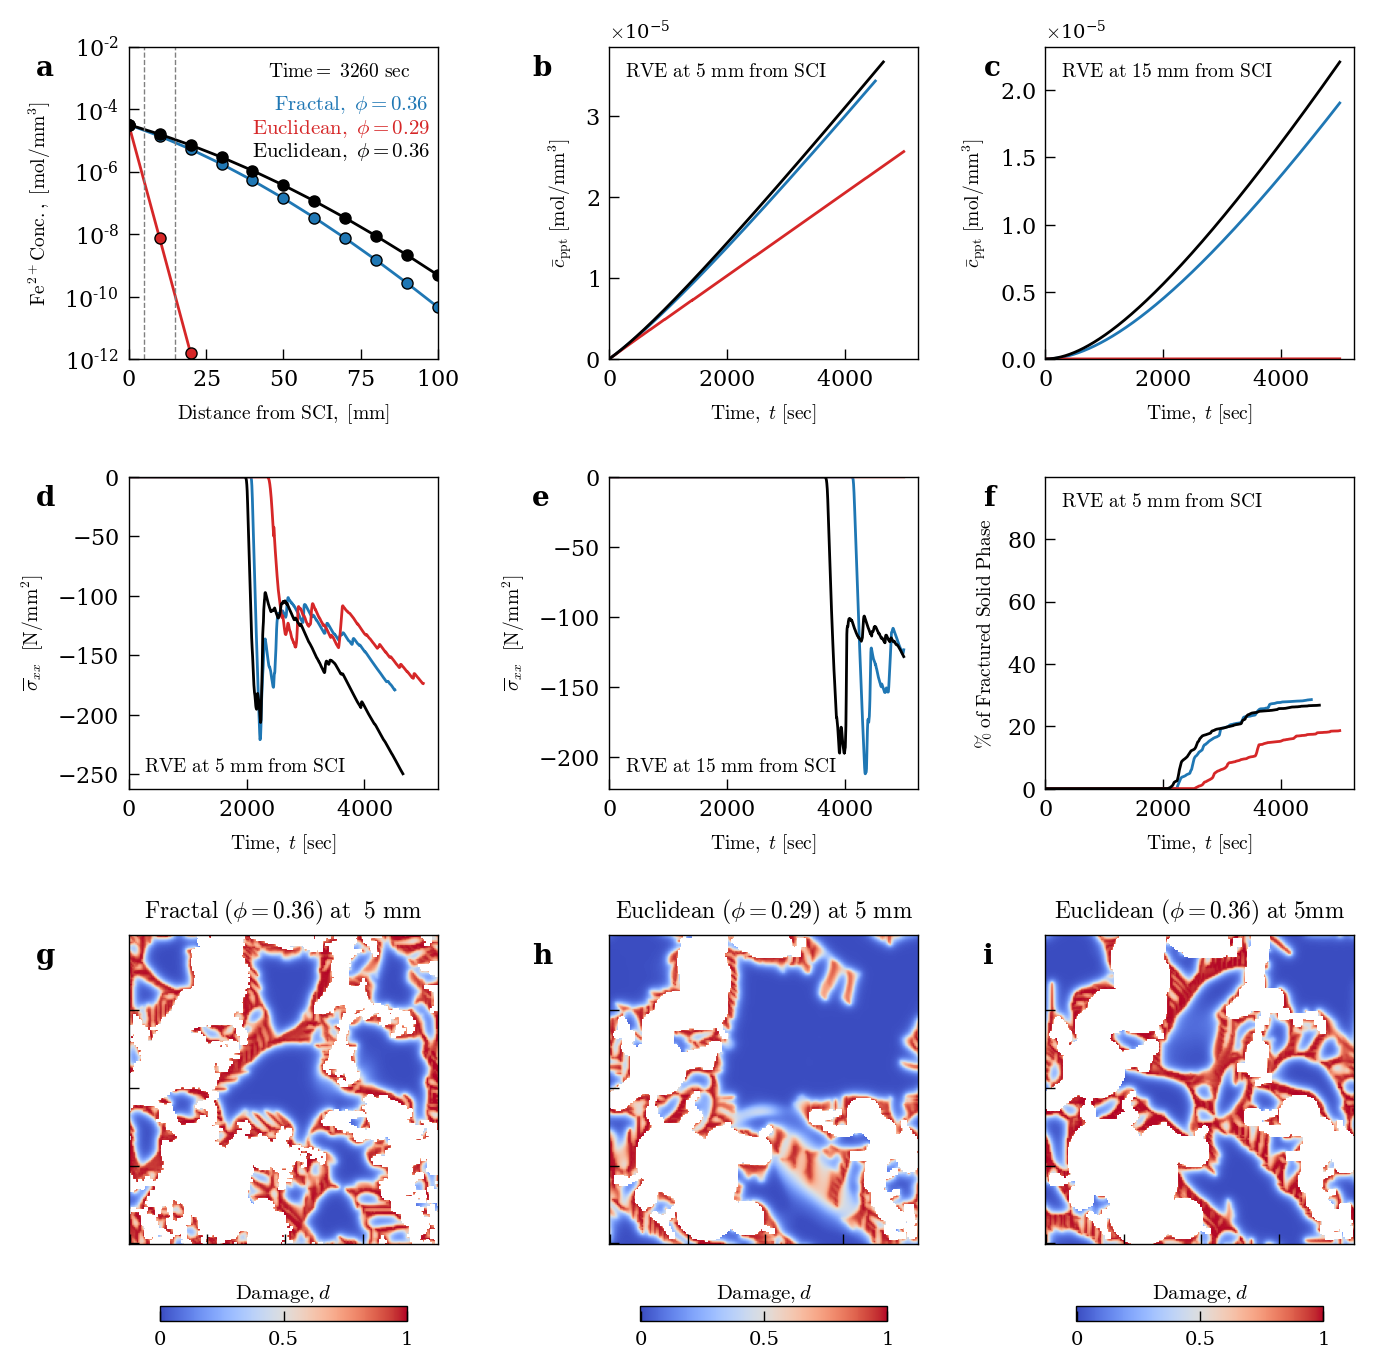

In [25]:
length = 1
Nx = 100
bar = np.linspace(0, Nx*10*length, Nx+1)    # mesh points in space

fig = plt.figure(figsize=set_size(fraction=0.95, height_ratio=1), constrained_layout=True, dpi=200)

gs1 = fig.add_gridspec(3, 3, wspace=0.1, hspace=0.1, 
                      width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

# concentration along the bar
ax = fig.add_subplot(gs1[0, 0])

colors = {'fractal'  : 'tab:blue',
         'euclidean' : 'tab:red'}

for name, job in concentrations_1.items():
    ax.semilogy(bar, job['concentration.macro'][1620], color=colors[job['type']], lw=1, 
                marker='o', ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
for name, job in concentrations_same.items():
    if job['rve'] == 1:
        ax.semilogy(bar, job['concentration.macro'][1620], color='xkcd:black', lw=1, 
                    marker='o', ms=4,  markeredgecolor='k', markeredgewidth=0.5)

    
ax.set_ylim(bottom=1e-12, top=1e-2)
ax.set_xlim(0, 100)

ax.text(0.45, 0.95, r'$\mathrm{Time = }~3260~\mathrm{sec}$', color='k', transform=ax.transAxes, fontsize=7, va='top')

ax.text(0.47, 0.85, r'$\mathrm{Fractal,~\phi=0.36}$', color='tab:blue', transform=ax.transAxes, fontsize=7.5, va='top')
ax.text(0.4, 0.775, r'$\mathrm{Euclidean,~\phi=0.29}$', color='tab:red', transform=ax.transAxes, fontsize=7.5, va='top')
ax.text(0.4, 0.7, r'$\mathrm{Euclidean,~\phi=0.36}$', color='k', transform=ax.transAxes, fontsize=7.5, va='top')
ax.text(-0.3, 0.975, 'a', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')


ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)

ax.axvline(5, color='grey', ls='--', lw=0.5)
ax.axvline(15, color='grey', ls='--', lw=0.5)
ax.set_xlabel(r'$\mathrm{Distance~from~SCI,}~[\mathrm{mm}]$')
ax.set_ylabel(r'$\mathrm{Fe^{2+} Conc.}, ~[\mathrm{mol/mm^3}]$')


#stresses in RVE 1 and RVE 2 against time (both fractal and euclidean)
ax = fig.add_subplot(gs1[1, 0])

for name, job in stresses_x_1.items():
    ax.plot(timings_1[name]['timings'], job['sigma_x.macro'], color=colors[job['type']], lw=1, 
                ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
for name, job in stresses_x_same.items():
    if job['rve'] == 1:
        ax.plot(timings_same[name]['timings'], job['sigma_x.macro'], color='xkcd:black', lw=1, 
                    ms=4,  markeredgecolor='k', markeredgewidth=0.5)

ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)
ax.set_xlim(0)
ax.set_ylim(top=0)

ax.set_ylabel(r'$\overline{\sigma}_{xx}~~[\mathrm{N/mm}^{2}]$')
ax.set_xlabel(r'$\mathrm{Time,}~t~[\mathrm{sec}]$')

ax.text(-0.3, 0.975, 'd', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')
ax.text(0.05, 0.1, r'$\mathrm{RVE~at}~5~\mathrm{mm~from~SCI}$', color='k', transform=ax.transAxes, fontsize=7, va='top', 
       fontweight='bold')

ax = fig.add_subplot(gs1[0, 1])

for name, job in precipitates_1.items():
    ax.plot(timings_1[name]['timings'], job['precipitate.macro'], color=colors[job['type']], lw=1, 
             alpha=1,   markevery=200,
            ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
for name, job in precipitates_same.items():
    if job['rve'] == 1:
        ax.plot(timings_same[name]['timings'], job['precipitate.macro'], color='xkcd:black', lw=1, 
         alpha=1,  markevery=200,
            ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)
ax.tick_params(axis='y')

ax.set_xlabel(r'$\mathrm{Time,}~t~[\mathrm{sec}]$')
ax.set_ylabel(r'$\bar{c}_{\mathrm{ppt}}~[\mathrm{mol/mm^3}]$')

ax.set_xlim(0)
ax.set_ylim(0)
ax.text(0.05, 0.95, r'$\mathrm{RVE~at}~ 5~\mathrm{mm~from~SCI}$', color='k', transform=ax.transAxes, fontsize=7, va='top', 
       fontweight='bold')
ax.text(-0.25, 0.975, 'b', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')
    
# precipitate concentration in RVE 1 and RVE 2 against time

ax = fig.add_subplot(gs1[1, 1])

for name, job in stresses_x_2.items():
    ax.plot(timings_2[name]['timings'], job['sigma_x.macro'], color=colors[job['type']], lw=1, 
                ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
    
for name, job in stresses_x_same.items():
    if job['rve'] == 2:
        ax.plot(timings_same[name]['timings'], job['sigma_x.macro'], color='xkcd:black', lw=1, 
                    ms=4,  markeredgecolor='k', markeredgewidth=0.5)


ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)
ax.set_xlim(0)
ax.set_ylim(top=0)

ax.set_xlabel(r'$\mathrm{Time,}~t~[\mathrm{sec}]$')
ax.set_ylabel(r'$\overline{\sigma}_{xx}~~[\mathrm{N/mm}^{2}]$')

ax.text(-0.25, 0.975, 'e', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')
ax.text(0.05, 0.1, r'$\mathrm{RVE~at}~ 15~\mathrm{mm~from~SCI}$', color='k', transform=ax.transAxes, fontsize=7, va='top',
       fontweight='bold')

ax = fig.add_subplot(gs1[0, 2])

for name, job in precipitates_2.items():
    ax.plot(timings_2[name]['timings'], job['precipitate.macro'], color=colors[job['type']], lw=1, alpha=1,
                 markevery=200, 
                ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
for name, job in precipitates_same.items():
    if job['rve'] == 2:
        ax.plot(timings_same[name]['timings'], job['precipitate.macro'], color='xkcd:black', lw=1, 
               alpha=1, markevery=200,
            ms=4,  markeredgecolor='k', markeredgewidth=0.5)

ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)

ax.set_xlabel(r'$\mathrm{Time,}~t~[\mathrm{sec}]$')
ax.set_ylabel(r'$\bar{c}_{\mathrm{ppt}}~[\mathrm{mol/mm^3}]$')

ax.set_xlim(0)
ax.set_ylim(0)
ax.tick_params(axis='y')
ax.text(0.05, 0.95, r'$\mathrm{RVE~at}~15~\mathrm{mm~from~SCI}$', color='k', transform=ax.transAxes, fontsize=7, va='top', 
       fontweight='bold')

ax.text(-0.2, 0.975, 'c', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')

# damage value at macro
ax = fig.add_subplot(gs1[1, 2])

for name, job in damages_macro_1.items():
    ax.plot(timings_1[name]['timings'], np.asarray(damage_macro[job['type']])*100, color=colors[job['type']], lw=1, alpha=1,
                 markevery=200, 
                ms=4,  markeredgecolor='k', markeredgewidth=0.5)

for name, job in damages_macro_same.items():
    if job['rve'] == 1:
        ax.plot(timings_same[name]['timings'], np.asarray(damages_same_list[job['rve']])*100, color='xkcd:black', lw=1, 
               alpha=1, markevery=200,
            ms=4,  markeredgecolor='k', markeredgewidth=0.5)

ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)

ax.set_xlabel(r'$\mathrm{Time,}~t~[\mathrm{sec}]$')
ax.set_ylabel(r'$\% \mathrm{~of~ Fractured~Solid~Phase}$')

ax.set_xlim(0)
ax.set_ylim(0, 100)
ax.set_yticks([0,20, 40, 60, 80])

ax.tick_params(axis='y')
ax.text(0.05, 0.95, r'$\mathrm{RVE~at}~5~\mathrm{mm~from~SCI}$', color='k', transform=ax.transAxes, fontsize=7, va='top', 
       fontweight='bold')

ax.text(-0.2, 0.975, 'f', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')


# crack pattern in RVE 1 at time
ax = fig.add_subplot(gs1[2, 0])
for name, job in damages_1.items():
    if job['type'] == 'fractal':
        cs = ax.imshow(np.ma.array(job['damage.micro'][1620].reshape(199, 199), 
                             mask=rve_1[name]['structure'][360].reshape(199, 199)), vmax=1, origin='lower', cmap='coolwarm')
ax.set_xticklabels([])
ax.set_yticklabels([])

axins1 = ax.inset_axes([0.1, -0.25, 0.8, 0.05])

cbar = fig.colorbar(cs, cax=axins1, pad=0.05, 
                      fraction=0.025, shrink=.5, ticks=[0, 0.5, 1], orientation="horizontal")
cbar.ax.set_xticklabels(['0', '0.5', '1'])
cbar.set_label(r'$\mathrm{Damage}, d$', fontsize=7.5, labelpad=-24, y=0.85)

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=8)

ax.text(-0.3, 0.975, 'g', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')
ax.set_title(r'$\mathrm{Fractal~(\phi=0.36)~at~}~5~\mathrm{mm}$')    
    
ax = fig.add_subplot(gs1[2, 1])
for name, job in damages_1.items():
    if job['type'] == 'euclidean':
        cs = ax.imshow(np.ma.array(job['damage.micro'][1620].reshape(199, 199), 
                             mask=rve_1[name]['structure'][360].reshape(199, 199)), vmax=1, origin='lower', cmap='coolwarm')
ax.set_xticklabels([])
ax.set_yticklabels([])

axins1 = ax.inset_axes([0.1, -0.25, 0.8, 0.05])

cbar = fig.colorbar(cs, cax=axins1, pad=0.05, 
                      fraction=0.025, shrink=.5,  ticks=[0, 0.5, 1], orientation="horizontal")
cbar.ax.set_xticklabels(['0', '0.5', '1'])
cbar.set_label(r'$\mathrm{Damage}, d$', fontsize=7.5, labelpad=-24, y=0.85)

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=8)

ax.text(-0.25, 0.975, 'h', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')
ax.set_title(r'$\mathrm{Euclidean~(\phi=0.29)~at~5}~\mathrm{mm}$')

ax = fig.add_subplot(gs1[2, 2])
for name, job in damages_same.items():
    if job['rve'] == 1:
        cs = ax.imshow(np.ma.array(job['damage.micro'][1620].reshape(199, 199), 
                             mask=rve_same[name]['structure'][360].reshape(199, 199)), vmax=1, origin='lower', cmap='coolwarm')
ax.set_xticklabels([])
ax.set_yticklabels([])

axins1 = ax.inset_axes([0.1, -0.25, 0.8, 0.05])

cbar = fig.colorbar(cs, cax=axins1, pad=0.05, 
                      fraction=0.025, shrink=.5, ticks=[0, 0.5, 1], orientation="horizontal")
cbar.ax.set_xticklabels(['0', '0.5', '1'])
cbar.set_label(r'$\mathrm{Damage}, d$', fontsize=7.5, labelpad=-24, y=0.85)

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=8)

ax.text(-0.2, 0.975, 'i', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')
ax.set_title(r'$\mathrm{Euclidean~(\phi=0.36)~at~5}\mathrm{mm}$')

plt.savefig('/cluster/work/cmbm/mpundir/pore-structure-study/figures/comparsion-higher-porosity.pdf', format='pdf')

plt.show()

## Comparison at low porosities

Comparing influence of approximating a fractal pore space for low porosity RVE.


Reading the data for Euclidean space generated with pore network algorithm . The corresponding dataset is `multiscale-lowe-network-same`.

In [50]:
schema = dm.Digger(path, 'multiscale-lower-network-same')
df = schema.showParametericSpace(shell_display=False)
df.loc[:, ~df.columns.isin(['path', 'schema'])]

flux                               idx  nb_steps  rve  time  \
0  1.000000e-08  761b9fd0042040f1b1d70b26efcebaaf      2500    1  5000   
1  1.000000e-08  aed69694346c4952a7b2d6f955e6651e      2500    1  5000   
2  1.000000e-08  53a77678bc5d41738225ecdf98ba4a7f      2500    2  5000   
3  1.000000e-08  fadb91e7b6f849deadc066b8bf4b48b8      2500    2  5000   

        type  
0  euclidean  
1    fractal  
2  euclidean  
3    fractal

In [51]:
fixed_param = {'rve' : 1}
varying_param = 'type'
concentrations_1 = schema.digQuantity(quantity='concentration.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param) 

stresses_x_1 = schema.digQuantity(quantity='sigma_x.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param)


precipitates_1 = schema.digQuantity(quantity='precipitate.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

timings_1 = schema.digQuantity(quantity='timings', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)



fixed_param = {'rve' : 2}
varying_param = 'type'
concentrations_2 = schema.digQuantity(quantity='concentration.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param) 

stresses_x_2 = schema.digQuantity(quantity='sigma_x.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param)


precipitates_2 = schema.digQuantity(quantity='precipitate.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

timings_2 = schema.digQuantity(quantity='timings', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)



Reading the data for Euclidean space generated with pore network algorithm andmodified to preserve tha porosity. The corresponding dataset is `multiscale-lower-porosity-same`.

In [52]:
schema2 = dm.Digger(path, 'multiscale-lower-porosity-same')
df = schema2.showParametericSpace(shell_display=False)
df.loc[:, ~df.columns.isin(['path', 'schema'])]

flux                               idx  nb_steps  rve  time  \
0  1.000000e-08  890374bf50f74a74b46528a6006e7c6a      2500    2  5000   
1  1.000000e-08  974ba55d5da94df6af58eb24e6883c1b      2500    1  5000   
2  1.000000e-08  6bea9cb4d97d40139f54cb108e068c3e      2500    1  5000   
3  1.000000e-08  225dffacbcad4d11bdc3c881d2c0fd1c      2500    2  5000   

        type  
0    fractal  
1    fractal  
2  euclidean  
3  euclidean

In [53]:
fixed_param = {'type' : 'euclidean'}
varying_param = 'rve'
concentrations_same = schema2.digQuantity(quantity='concentration.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param) 

stresses_x_same = schema2.digQuantity(quantity='sigma_x.macro', 
                                    varying_parameter=varying_param, 
                                       fixed_parameters=fixed_param)


precipitates_same = schema2.digQuantity(quantity='precipitate.macro', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)

timings_same = schema2.digQuantity(quantity='timings', 
                                varying_parameter=varying_param, 
                                fixed_parameters=fixed_param)


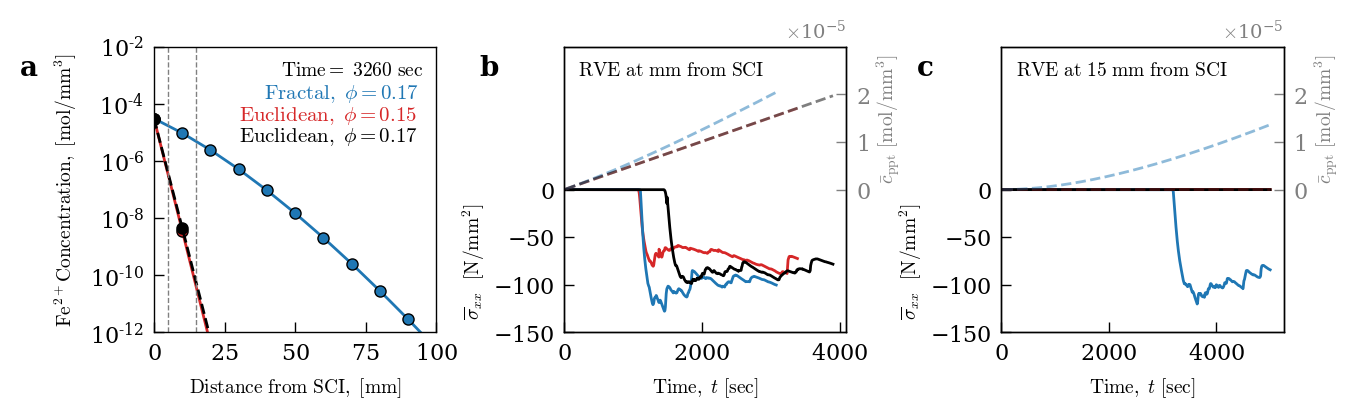

In [58]:
length = 1
Nx = 100
bar = np.linspace(0, Nx*10*length, Nx+1)    # mesh points in space

fig = plt.figure(figsize=set_size(fraction=0.925, height_ratio=0.3),
                 constrained_layout=True, dpi=200)

gs1 = fig.add_gridspec(1, 3, wspace=0, hspace=0.1, 
                      width_ratios=[1, 1, 1])

# concentration along the bar
ax = fig.add_subplot(gs1[0, 0])

colors = {'fractal'  : 'tab:blue',
         'euclidean' : 'tab:red'}

for name, job in concentrations_1.items():
    ax.semilogy(bar, job['concentration.macro'][1530], color=colors[job['type']], lw=1, 
                marker='o', ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
for name, job in concentrations_same.items():
    if job['rve'] == 1:
        ax.semilogy(bar, job['concentration.macro'][1530], color='xkcd:black', lw=1, ls='--', 
                    marker='o', ms=4,  markeredgecolor='k', markeredgewidth=0.5)

    
ax.set_ylim(bottom=1e-12, top=1e-2)
ax.set_xlim(0, 100)

ax.text(0.45, 0.95, r'$\mathrm{Time = }~3260~\mathrm{sec}$', color='k', transform=ax.transAxes, fontsize=7, va='top')


ax.text(0.39, 0.875, r'$\mathrm{Fractal,~\phi=0.17}$', color='tab:blue', transform=ax.transAxes, fontsize=7.5, va='top')
ax.text(0.3, 0.8, r'$\mathrm{Euclidean,~\phi=0.15}$', color='tab:red', transform=ax.transAxes, fontsize=7.5, va='top')
ax.text(0.3, 0.725, r'$\mathrm{Euclidean,~\phi=0.17}$', color='k', transform=ax.transAxes, fontsize=7.5, va='top')
ax.text(-0.475, 0.975, 'a', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')

ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)

ax.axvline(5, color='grey', ls='--', lw=0.5)
ax.axvline(15, color='grey', ls='--', lw=0.5)
ax.set_xlabel(r'$\mathrm{Distance~from~SCI,}~[\mathrm{mm}]$')
ax.set_ylabel(r'$\mathrm{Fe^{2+} Concentration}, ~[\mathrm{mol/mm^3}]$')


#stresses in RVE 1 and RVE 2 against time (both fractal and euclidean)
ax = fig.add_subplot(gs1[0, 1])

for name, job in stresses_x_1.items():
    ax.plot(timings_1[name]['timings'], job['sigma_x.macro'], color=colors[job['type']], lw=1, 
                ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
for name, job in stresses_x_same.items():
    if job['rve'] == 1:
        ax.plot(timings_same[name]['timings'], job['sigma_x.macro'], color='xkcd:black', lw=1, 
                    ms=4,  markeredgecolor='k', markeredgewidth=0.5)

ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)
ax.set_xlim(0)
ax.set_ylim(bottom=-150, top=150)
ax.set_yticks([0,-50, -100,-150])
ax.yaxis.set_label_coords(-0.275,0.25)

ax.set_ylabel(r'$\overline{\sigma}_{xx}~~[\mathrm{N/mm}^{2}]$')
ax.set_xlabel(r'$\mathrm{Time,}~t~[\mathrm{sec}]$')

ax.text(-0.3, 0.975, 'b', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')
ax.text(0.05, 0.95, r'$\mathrm{RVE~at}~\mathrm{mm~from~SCI}$', color='k', transform=ax.transAxes, fontsize=7, va='top', 
       fontweight='bold')

ax2 = ax.twinx()

for name, job in precipitates_1.items():
    ax2.plot(timings_1[name]['timings'], job['precipitate.macro'], color=colors[job['type']], lw=1, 
             ls='--',  alpha=0.5,        markevery=200,
            ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
for name, job in precipitates_same.items():
    if job['rve'] == 1:
        ax2.plot(timings_same[name]['timings'], job['precipitate.macro'], color='xkcd:black', lw=1, 
             ls='--',  alpha=0.5,         markevery=200,
            ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
ax2.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='minor', labelsize=7)
ax2.tick_params(axis='y', colors='grey')

ax2.set_xlabel(r'$\mathrm{Time,}~t~[\mathrm{sec}]$')
ax2.set_ylabel(r'$\bar{c}_{\mathrm{ppt}}~[\mathrm{mol/mm^3}]$',  color='grey')

ax2.set_xlim(0)
ax2.set_ylim(bottom=-3e-5, top=3e-5)
ax2.set_yticks([0, 1e-5, 2e-5])

ax2.yaxis.set_label_coords(1.1,0.75)

ax = fig.add_subplot(gs1[0, 2])  

for name, job in stresses_x_2.items():
    ax.plot(timings_2[name]['timings'], job['sigma_x.macro'], color=colors[job['type']], lw=1, 
                ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
    
for name, job in stresses_x_same.items():
    if job['rve'] == 2:
        ax.plot(timings_same[name]['timings'], job['sigma_x.macro'], color='xkcd:black', lw=1, 
                    ms=4,  markeredgecolor='k', markeredgewidth=0.5)


ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)
ax.set_xlim(0)
ax.set_ylim(bottom=-150, top=150)
ax.set_yticks([0,-50, -100,-150])

ax.set_xlabel(r'$\mathrm{Time,}~t~[\mathrm{sec}]$')
ax.set_ylabel(r'$\overline{\sigma}_{xx}~~[\mathrm{N/mm}^{2}]$')



ax.text(-0.3, 0.975, 'c', transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top')
ax.text(0.05, 0.95, r'$\mathrm{RVE~at}~15~\mathrm{mm~from~SCI}$', color='k', transform=ax.transAxes, fontsize=7, va='top',
       fontweight='bold')
ax.yaxis.set_label_coords(-0.275,0.25)

ax2 = ax.twinx()

for name, job in precipitates_2.items():
    ax2.plot(timings_2[name]['timings'], job['precipitate.macro'], color=colors[job['type']], lw=1, 
               markevery=200, ls='--', alpha=0.5,
                ms=4,  markeredgecolor='k', markeredgewidth=0.5)
    
for name, job in precipitates_same.items():
    if job['rve'] == 2:
        ax2.plot(timings_same[name]['timings'], job['precipitate.macro'], color='xkcd:black', lw=1, 
             ls='--',   alpha=0.5,         markevery=200,
            ms=4,  markeredgecolor='k', markeredgewidth=0.5)
 
ax2.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='minor', labelsize=7)

ax2.set_xlabel(r'$\mathrm{Time,}~t~[\mathrm{sec}]$')
ax2.set_ylabel(r'$\bar{c}_{\mathrm{ppt}}~[\mathrm{mol/mm^3}]$', color='grey')

ax2.set_xlim(0)
ax2.set_ylim(bottom=-3e-5, top=3e-5)
ax2.set_yticks([0, 1e-5, 2e-5])

ax2.yaxis.set_label_coords(1.1,0.75)

ax2.tick_params(axis='y', colors='grey')
plt.savefig('/cluster/work/cmbm/mpundir/pore-structure-study/figures/comparsion-lower-porosity.pdf', format='pdf')

plt.show()